    Mon Jun 26 17:40:59 PDT 2023

We discussed a plan w/ Luke:
- onePAGE analysis of [GOBP_LEUKOCYTE_DIFFERENTIATION](https://www.gsea-msigdb.org/gsea/msigdb/human/geneset/GOBP_LEUKOCYTE_DIFFERENTIATION.html), 
- compare with other DIFFERENTIATION genesets, 
- show CHEMOTAXIS genesets.

__Aim:__ Consistency analysis across cell lines using pathway enrichment results to find commonly up/down regulated pathways and their genes. 

___
- https://github.com/abearab/pager
- https://github.com/tanghaibao/goatools
- https://gseapy.readthedocs.io/en/latest/index.html

Hani: _"You must redo iPAGE with `--independence=0` option for comparing results between multiple smaples."_

In [1]:
import re
import sys
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from time import time 
from glob import glob
from matplotlib.pyplot import subplots
from itertools import chain
from functools import reduce
from venn import venn

# sys.path.append('/rumi/shams/abe/Projects/ipage-down/')
sys.path.append('/data_gilbert/home/aarab/tools/pager/')

import upsetplot as us
import pager
from matplotlib.backends.backend_pdf import PdfPages

from IPython.display import IFrame

In [20]:
pagerdir='/data_gilbert/home/aarab/tools/pager'

In [2]:
# def get_pvmatrix_list(parent_path,pattern):
#     """
#     pattern: msigdb gene set cluster name 
#     """
#     return glob(f'{parent_path}/*{pattern}*/pvmatrix.txt')

# def get_pv_signal(exp,patterns,pdf=None):
#     """
#     exp: experiment name
#     patterns: list of patterns
#     """
#     cols = pd.concat([
#         pager.pvmat2bio_signal(pager.merge_multiple_pvmat(
#             get_pvmatrix_list(f"{exp}_fdr","c1")
#         ),s,n_clust=1) for s in ['up','both','down']
#     ]).columns
    
#     pv_signal = pd.concat([
#         pager.pvmat2bio_signal(pager.merge_multiple_pvmat([
#             pvmat for pattern in patterns
#             for pvmat in 
#             get_pvmatrix_list(f"{exp}",pattern) + \
#             get_pvmatrix_list(f"{exp}_fdr",pattern)
#         ]),s,n_clust=2) for s in ['up','both','down']
#     ])
    
#     pv_signal.columns = cols
#     pv_signal=pv_signal[~pv_signal.duplicated()]
    
#     if pdf:
#         pv_signal.to_csv('temp-pvmatrix.txt',sep='\t')
    
#         !bash {pager_dir}/iPAGE_draw_matrix.sh \
#             {exp}'.txt' "temp-pvmatrix.txt" \
#             {pdf} &> /dev/null
    
#         !rm -v 'temp-pvmatrix.txt'
#     else: 
#         return pv_signal


In [3]:
dictfilt = lambda x, y: dict([ (i,x[i]) for i in x if i in set(y) ])

In [4]:
sys.path[-1]

'/data_gilbert/home/aarab/tools/pager/'

In [5]:
# !cat /data_gilbert/home/aarab/Projects/pager/ipage_loop.sh

## $\Delta$Expression

#### `ind0`

In [ ]:
%%bash
export PAGEDIR='/data_gilbert/home/aarab/iPAGE'

cd exp/
ls *_delta_exp.txt | parallel -j18 -k bash /data_gilbert/home/aarab/Projects/pager/ipage_loop.sh
cd ../

### Remake from pvmatrix (correct bin clusters)

In [9]:
cell_line_pws = {}

### HL-60 time series

In [10]:
# cell_line_pws ['120h'] = merge_multiple_pvmat(
#     pvmat_list = glob('exp/hl60_120h_delta_exp_ind0/*c5*/pvmatrix.[L-R].txt')
# )

#### hl60 6h delta_exp

In [21]:
study = 'hl60_6h_delta_exp'

pvmat = pager.merge_multiple_pvmat(
    pvmat_list = glob(f'exp/{study}/*c5.go*/pvmatrix.txt')
)

bio_signal = pd.concat([
    pager.pvmat2bio_signal(pvmat,side='down',n_clust=1),
    pager.pvmat2bio_signal(pvmat,side='up',n_clust=1),
    pager.pvmat2bio_signal(pvmat,side='both'),
],axis=0)


bio_signal = bio_signal[bio_signal.index.str.contains('CHEMOTAXIS')]


bio_signal.to_csv(f'exp/{study}_pvmatrix.txt',sep='\t')
cell_line_pws[study] = bio_signal
exp_file = f'{study}.txt'
pvmat_file = f'{study}_pvmatrix.txt'
pdf_file = f'{study}.pdf'

!cd exp; bash {pagerdir}/iPAGE_draw_matrix.sh $exp_file $pvmat_file $pdf_file &> /dev/null; cd ../

/data_gilbert/home/aarab/tools/pager/pager.py:235: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  read_pvmatrix(pvmat).set_axis(cols, axis=1, inplace=False)
/data_gilbert/home/aarab/tools/pager/pager.py:235: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  read_pvmatrix(pvmat).set_axis(cols, axis=1, inplace=False)
/data_gilbert/home/aarab/tools/pager/pager.py:235: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  read_pvmatrix(pvmat).set_axis(cols, axis=1, inplace=False)


In [22]:
pdf = 'exp/hl60_6h_delta_exp.pdf'
IFrame(pdf, width=800, height=300)

In [23]:
# gs_cluster_path = pager.detect_gs_cluster(pvmat_list, gs=gs)

# print ([p.split('/')[1:3] for p in gs_cluster_path])

# gs_cluster_path = gs_cluster_path[1].split('pvmatrix.R.txt')[0]
# print ('Down')
# print (pager.bin_identifier_genes(gs_cluster_path, '0', gs=gs))
# print ('Up')
# print (pager.bin_identifier_genes(gs_cluster_path, '9', gs=gs))
# print (pager.bin_identifier_genes(gs_cluster_path, '10', gs=gs))

#### hl60 72h delta_exp

In [24]:
study = 'hl60_72h_delta_exp'

pvmat = pager.merge_multiple_pvmat(
    pvmat_list = glob(f'exp/{study}/*c5.go*/pvmatrix.txt') #+ glob(f'exp/{study}_ind1/*c2.cp.kegg*/pvmatrix.txt')
)

# bio_signal = pd.concat([
#     pager.pvmat2bio_signal(pvmat,side='down',n_clust=1),
#     pager.pvmat2bio_signal(pvmat,side='down',n_clust=2),
#     pager.pvmat2bio_signal(pvmat,side='up',n_clust=1),
#     pager.pvmat2bio_signal(pvmat,side='up',n_clust=2),
#     pager.pvmat2bio_signal(pvmat,side='both'),
# ],axis=0)


bio_signal = pvmat

# bio_signal = bio_signal[bio_signal.index.str.contains('CHEMOTAXIS'.upper())]
bio_signal = bio_signal[bio_signal.index.str.contains('hemopoiesis'.upper())]
# bio_signal = bio_signal[bio_signal.index.str.contains('Neutrophil'.upper())]




cell_line_pws[study] = bio_signal

bio_signal.to_csv(f'exp/{study}_pvmatrix.txt',sep='\t')

exp_file = f'{study}.txt'
pvmat_file = f'{study}_pvmatrix.txt'
pdf_file = f'{study}.pdf'

!cd exp; bash {pagerdir}/iPAGE_draw_matrix.sh $exp_file $pvmat_file $pdf_file &> /dev/null; cd ../

/data_gilbert/home/aarab/tools/pager/pager.py:235: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  read_pvmatrix(pvmat).set_axis(cols, axis=1, inplace=False)
/data_gilbert/home/aarab/tools/pager/pager.py:235: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  read_pvmatrix(pvmat).set_axis(cols, axis=1, inplace=False)
/data_gilbert/home/aarab/tools/pager/pager.py:235: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  read_pvmatrix(pvmat).set_axis(cols, axis=1, inplace=False)


In [25]:
pdf = 'exp/hl60_72h_delta_exp.pdf'
IFrame(pdf, width=800, height=300)

#### hl60 120h delta_exp

In [3]:
study = 'hl60_120h_delta_exp'

pvmat = pager.merge_multiple_pvmat(
    pvmat_list = glob(f'exp/{study}/*c5*/pvmatrix.txt')
    # pvmat_list = glob(f'exp/{study}/*c8*/pvmatrix.txt')
    
)

# bio_signal = pd.concat([
#     pager.pvmat2bio_signal(pvmat,side='down',n_clust=1),
#     pager.pvmat2bio_signal(pvmat,side='down',n_clust=2),
#     pager.pvmat2bio_signal(pvmat,side='up',n_clust=1),
#     pager.pvmat2bio_signal(pvmat,side='up',n_clust=2),
#     # pager.pvmat2bio_signal(pvmat,side='both'),
# ],axis=0)


bio_signal = pvmat



# bio_signal = bio_signal[bio_signal.index.str.contains('CHEMOTAXIS'.upper())]
# bio_signal = bio_signal[bio_signal.index.str.contains('leukocyte'.upper())]
# bio_signal = bio_signal[bio_signal.index.str.contains('MYELOID')]
bio_signal = bio_signal[bio_signal.index.str.contains('DIFFERENTIATION')]



cell_line_pws[study] = bio_signal

bio_signal.to_csv(f'exp/{study}_pvmatrix.txt',sep='\t')

exp_file = f'{study}.txt'
pvmat_file = f'{study}_pvmatrix.txt'
pdf_file = f'{study}.pdf'

!cd exp; bash {pagerdir}/iPAGE_draw_matrix.sh $exp_file $pvmat_file $pdf_file &> /dev/null; cd ../

NameError: name 'pager' is not defined

In [22]:
pdf = f'exp/{study}.pdf'
IFrame(pdf, width=800, height=400)

### 
___

In [243]:
gs = "GOBP_MONOCYTE_CHEMOTAXIS"
# pager.detect_gs_cluster(glob(f'exp/{study}/*c5.go.mf*/pvmatrix.txt'), gs)[0]

l_120 = {
    g 
    for c in ["10"]
    for g in list(pager.bin_identifier_genes("exp/hl60_120h_delta_exp/msigdb_v7.4_c5.go.bp", c, gs).values())[0]
}

'","'.join(set(list(l_72) + list(l_120)))

'NOD2","LGALS3","S100A12","CCL5","IL1R1","CXCL3","CCN3","CCL3","CCL14","FPR2","PLA2G7","CCL24","DUSP1","CCL1","SLIT2","CCL20","CCR1","C3AR1","SERPINE1","CXCL11","ADAM8","CCL3L1","CCL15","CXCL1","FLT1","CCL2","EDN1","CXCR1","CCL4","DEFB124","DPP4","PLA2G1B'

In [217]:
gs = "GOBP_NEUTROPHIL_MIGRATION"
# pager.detect_gs_cluster(glob(f'exp/{study}/*c5.go.mf*/pvmatrix.txt'), gs)[0]

l_72 = {
    g 
    for c in ["10"]
    for g in list(pager.bin_identifier_genes("exp/hl60_72h_delta_exp/msigdb_v7.4_c5.go.bp", c, gs).values())[0]
}

l_120 = {
    g 
    for c in ["10"]
    for g in list(pager.bin_identifier_genes("exp/hl60_120h_delta_exp/msigdb_v7.4_c5.go.bp", c, gs).values())[0]
}

'","'.join(set(list(l_72) + list(l_120)))

'NOD2","LGALS3","S100A12","CCL5","CXCL6","S100A8","IL1R1","CXCL3","CCL3","CCL14","MDK","CXCL5","XG","CCL24","CCL1","RHOH","SLIT2","CCL20","RIPOR2","C5AR1","C3AR1","CXCL8","CXCL11","ADAM8","CCL3L1","CD177","CCL15","CXCL1","JAML","CCL2","EDN1","CXCR1","CCL4","S100A9","DPP4","PLA2G1B'

In [216]:
gs = "GOBP_CHONDROCYTE_DIFFERENTIATION"
# pager.detect_gs_cluster(glob(f'exp/{study}/*c5.go.mf*/pvmatrix.txt'), gs)[0]

l_72 = {
    g 
    for c in ["10"]
    for g in list(pager.bin_identifier_genes("exp/hl60_72h_delta_exp/msigdb_v7.4_c5.go.bp", c, gs).values())[0]
}

l_120 = {
    g 
    for c in ["10"]
    for g in list(pager.bin_identifier_genes("exp/hl60_120h_delta_exp/msigdb_v7.4_c5.go.bp", c, gs).values())[0]
}

'","'.join(set(list(l_72) + list(l_120)))

'COL11A1","CHADL","COL2A1","ADAMTS7","CCN3","NKX3-2","ACVRL1","PTH1R","SOX5","AXIN2","MDK","SHOX2","BMPR1B","GDF6","MATN1","BMPR1A","GLI2","WNT9A","FGFR3","SULF2","SMPD3","IHH","BMP4","CCN4","GDF5","EXT1","TRPS1","COL27A1","WNT5B'

### 72h trearment in all cell lines 

#### hl60_72h_only_delta_exp

In [254]:
study = 'hl60_72h_only_delta_exp'

pvmat = pager.merge_multiple_pvmat(
    pvmat_list = glob(f'exp/{study}/*c5.go.bp*/pvmatrix.txt')
)

bio_signal = pd.concat([
    pager.pvmat2bio_signal(pvmat,side='down',n_clust=1),
    pager.pvmat2bio_signal(pvmat,side='down',n_clust=2),
    pager.pvmat2bio_signal(pvmat,side='up',n_clust=1),
    pager.pvmat2bio_signal(pvmat,side='up',n_clust=2),
    pager.pvmat2bio_signal(pvmat,side='both'),
],axis=0)


bio_signal = bio_signal[bio_signal.index.str.contains('CHEMOTAXIS'.upper())]



bio_signal.to_csv(f'exp/{study}_pvmatrix.txt',sep='\t')
cell_line_pws[study] = bio_signal
exp_file = f'{study}.txt'
pvmat_file = f'{study}_pvmatrix.txt'
pdf_file = f'{study}.pdf'

!cd exp; bash {pagerdir}/iPAGE_draw_matrix.sh $exp_file $pvmat_file $pdf_file &> /dev/null; cd ../

In [255]:
pdf = 'exp/hl60_72h_only_delta_exp.pdf'
IFrame(pdf, width=800, height=300)

#### molm14_delta_exp

In [256]:
study = 'molm14_delta_exp'

pvmat = pager.merge_multiple_pvmat(
    pvmat_list = glob(f'exp/{study}/*c5.go.bp*/pvmatrix.txt')
)

bio_signal = pd.concat([
    pager.pvmat2bio_signal(pvmat,side='down',n_clust=1),
    pager.pvmat2bio_signal(pvmat,side='down',n_clust=2),
    pager.pvmat2bio_signal(pvmat,side='up',n_clust=2),
    pager.pvmat2bio_signal(pvmat,side='up',n_clust=1),
    pager.pvmat2bio_signal(pvmat,side='both'),
],axis=0)



bio_signal = bio_signal[bio_signal.index.str.contains('CHEMOTAXIS'.upper())]


bio_signal.to_csv(f'exp/{study}_pvmatrix.txt',sep='\t')
cell_line_pws[study] = bio_signal
exp_file = f'{study}.txt'
pvmat_file = f'{study}_pvmatrix.txt'
pdf_file = f'{study}.pdf'

!cd exp; bash {pagerdir}/iPAGE_draw_matrix.sh $exp_file $pvmat_file $pdf_file &> /dev/null; cd ../

In [257]:
pdf = 'exp/molm14_delta_exp.pdf'
IFrame(pdf, width=800, height=300)

#### ociaml2_delta_exp

In [258]:
study = 'ociaml2_delta_exp'

pvmat = pager.merge_multiple_pvmat(
    pvmat_list = glob(f'exp/{study}/*c5.go.bp*/pvmatrix.txt')
)

bio_signal = pd.concat([
    pager.pvmat2bio_signal(pvmat,side='down',n_clust=2),
    pager.pvmat2bio_signal(pvmat,side='down',n_clust=1),
    pager.pvmat2bio_signal(pvmat,side='up',n_clust=2),
    pager.pvmat2bio_signal(pvmat,side='up',n_clust=1),
    pager.pvmat2bio_signal(pvmat,side='both'),
],axis=0)


bio_signal = bio_signal[bio_signal.index.str.contains('CHEMOTAXIS'.upper())]


bio_signal.to_csv(f'exp/{study}_pvmatrix.txt',sep='\t')
cell_line_pws[study] = bio_signal
exp_file = f'{study}.txt'
pvmat_file = f'{study}_pvmatrix.txt'
pdf_file = f'{study}.pdf'

!cd exp; bash {pagerdir}/iPAGE_draw_matrix.sh $exp_file $pvmat_file $pdf_file &> /dev/null; cd ../

In [259]:
pdf = 'exp/ociaml2_delta_exp.pdf'
IFrame(pdf, width=800, height=300)

#### ociaml3_delta_exp

In [262]:
study = 'ociaml3_delta_exp'

pvmat = pager.merge_multiple_pvmat(
    pvmat_list = glob(f'exp/{study}/*c5.go*/pvmatrix.txt')
)

bio_signal = pd.concat([
    pager.pvmat2bio_signal(pvmat,side='down',n_clust=2),
    pager.pvmat2bio_signal(pvmat,side='down',n_clust=1),
    pager.pvmat2bio_signal(pvmat,side='up',n_clust=2),
    pager.pvmat2bio_signal(pvmat,side='up',n_clust=1),
    pager.pvmat2bio_signal(pvmat,side='both'),
],axis=0)


bio_signal = bio_signal[bio_signal.index.str.contains('CHEMOTAXIS'.upper())]


bio_signal.to_csv(f'exp/{study}_pvmatrix.txt',sep='\t')
cell_line_pws[study] = bio_signal
exp_file = f'{study}.txt'
pvmat_file = f'{study}_pvmatrix.txt'
pdf_file = f'{study}.pdf'

!cd exp; bash {pagerdir}/iPAGE_draw_matrix.sh $exp_file $pvmat_file $pdf_file &> /dev/null; cd ../

/data_gilbert/home/aarab/tools/pager/pager.py:235: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  read_pvmatrix(pvmat).set_axis(cols, axis=1, inplace=False)
/data_gilbert/home/aarab/tools/pager/pager.py:235: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  read_pvmatrix(pvmat).set_axis(cols, axis=1, inplace=False)
/data_gilbert/home/aarab/tools/pager/pager.py:235: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  read_pvmatrix(pvmat).set_axis(cols, axis=1, inplace=False)


In [263]:
pdf = 'exp/ociaml3_delta_exp.pdf'
IFrame(pdf, width=800, height=300)

#### thp1_delta_exp

In [264]:
study = 'thp1_delta_exp'

pvmat = pager.merge_multiple_pvmat(
    pvmat_list = glob(f'exp/{study}/*c5.go*/pvmatrix.txt')
)

bio_signal = pd.concat([
    pager.pvmat2bio_signal(pvmat,side='down',n_clust=2),
    pager.pvmat2bio_signal(pvmat,side='down',n_clust=1),
    pager.pvmat2bio_signal(pvmat,side='up',n_clust=2),
    pager.pvmat2bio_signal(pvmat,side='up',n_clust=1),
    pager.pvmat2bio_signal(pvmat,side='both'),
],axis=0)


bio_signal = bio_signal[bio_signal.index.str.contains('CHEMOTAXIS'.upper())]


bio_signal.to_csv(f'exp/{study}_pvmatrix.txt',sep='\t')
cell_line_pws[study] = bio_signal
exp_file = f'{study}.txt'
pvmat_file = f'{study}_pvmatrix.txt'
pdf_file = f'{study}.pdf'

!cd exp; bash {pagerdir}/iPAGE_draw_matrix.sh $exp_file $pvmat_file $pdf_file &> /dev/null; cd ../

/data_gilbert/home/aarab/tools/pager/pager.py:235: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  read_pvmatrix(pvmat).set_axis(cols, axis=1, inplace=False)
/data_gilbert/home/aarab/tools/pager/pager.py:235: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  read_pvmatrix(pvmat).set_axis(cols, axis=1, inplace=False)
/data_gilbert/home/aarab/tools/pager/pager.py:235: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  read_pvmatrix(pvmat).set_axis(cols, axis=1, inplace=False)


In [265]:
pdf = 'exp/thp1_delta_exp.pdf'
IFrame(pdf, width=800, height=300)

#### kg1_delta_exp

In [266]:
study = 'kg1_delta_exp'

pvmat = pager.merge_multiple_pvmat(
    pvmat_list = glob(f'exp/{study}/*c5.go.bp*/pvmatrix.txt')
)

bio_signal = pd.concat([
    pager.pvmat2bio_signal(pvmat,side='down',n_clust=2),
    pager.pvmat2bio_signal(pvmat,side='down',n_clust=1),
    pager.pvmat2bio_signal(pvmat,side='up',n_clust=2),
    pager.pvmat2bio_signal(pvmat,side='up',n_clust=1),
    pager.pvmat2bio_signal(pvmat,side='both'),
],axis=0)


bio_signal = bio_signal[bio_signal.index.str.contains('CHEMOTAXIS'.upper())]


bio_signal.to_csv(f'exp/{study}_pvmatrix.txt',sep='\t')
cell_line_pws[study] = bio_signal
exp_file = f'{study}.txt'
pvmat_file = f'{study}_pvmatrix.txt'
pdf_file = f'{study}.pdf'

!cd exp; bash {pagerdir}/iPAGE_draw_matrix.sh $exp_file $pvmat_file $pdf_file &> /dev/null; cd ../

In [267]:
pdf = 'exp/kg1_delta_exp.pdf'
IFrame(pdf, width=800, height=300)

# Intersection 

In [268]:
for name in cell_line_pws:
    cell_line_pws[name].columns = list(range(11))

source: https://www.nature.com/articles/s41586-021-03313-9/figures/9

I want something like module g

<img src="https://media.springernature.com/full/springer-static/esm/art%3A10.1038%2Fs41586-021-03313-9/MediaObjects/41586_2021_3313_Fig9_ESM.jpg?as=webp" width=600 > 

### HL-60

In [269]:
data = dict([
    ('6h_dn',  set(cell_line_pws['hl60_6h_delta_exp'  ].loc[cell_line_pws['hl60_6h_delta_exp'].iloc  [:,0]   > 2,:].index.to_list())),
    ('6h_up',  set(cell_line_pws['hl60_6h_delta_exp'  ].loc[cell_line_pws['hl60_6h_delta_exp'].iloc  [:,10]  > 2,:].index.to_list())),
    ('72h_dn', set(cell_line_pws['hl60_72h_delta_exp' ].loc[cell_line_pws['hl60_72h_delta_exp'].iloc [:,0]   > 2,:].index.to_list())),
    ('72h_up', set(cell_line_pws['hl60_72h_delta_exp' ].loc[cell_line_pws['hl60_72h_delta_exp'].iloc [:,10]  > 2,:].index.to_list())),
    ('120h_dn',set(cell_line_pws['hl60_120h_delta_exp'].loc[cell_line_pws['hl60_120h_delta_exp'].iloc[:,0]   > 2,:].index.to_list())),
    ('120h_up',set(cell_line_pws['hl60_120h_delta_exp'].loc[cell_line_pws['hl60_120h_delta_exp'].iloc[:,10]  > 2,:].index.to_list())),
])

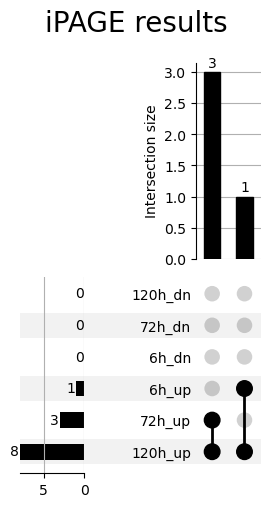

In [270]:
fig1 = plt.figure()
upset1 = us.UpSet(
    us.from_contents(data),
    # min_subset_size=5,
    min_degree=2,
    # max_degree=3,
    orientation='horizontal',show_counts=True,
)
# upset1.style_subsets(present='hl60_72h_only',edgecolor="red",linewidth=2)
upset1.plot(fig=fig1)
fig1.suptitle('iPAGE results',fontsize=20)
plt.show()
# pdf.savefig()

# 

In [162]:
!date

Wed Oct 19 14:55:19 PDT 2022
